In [2]:
# Import all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [15]:
data = pd.read_csv("spam_sms.csv")
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# Check the distribution of spam vs. ham
print(data['v1'].value_counts())

v1
ham     4825
spam     747
Name: count, dtype: int64


In [6]:
print(data.describe())

          title                                               text      type
count        84                                                 84        84
unique       78                                                 82         2
top     English  Model Casting Call\nThank you for taking the t...  not spam
freq          3                                                  2        58


### **Step 02: Text Processsing**

In [18]:
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    
    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]
    
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

# Apply preprocessing to the messages
data['cleaned_message'] = data['v2'].apply(preprocess_text)

### **Step 03 Feature Extraction**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the cleaned messages
X = vectorizer.fit_transform(data['cleaned_message'])

# Convert labels to binary (0 for ham, 1 for spam)
y = data['v1'].apply(lambda x: 1 if x == 'spam' else 0)

# Check the shape of the feature matrix and labels
print(X.shape)
print(y.shape)


(5572, 8044)
(5572,)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9390
Precision: 0.9457
Recall: 0.5800
F1 Score: 0.7190

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       965
           1       0.95      0.58      0.72       150

    accuracy                           0.94      1115
   macro avg       0.94      0.79      0.84      1115
weighted avg       0.94      0.94      0.93      1115

Confusion Matrix:
[[960   5]
 [ 63  87]]


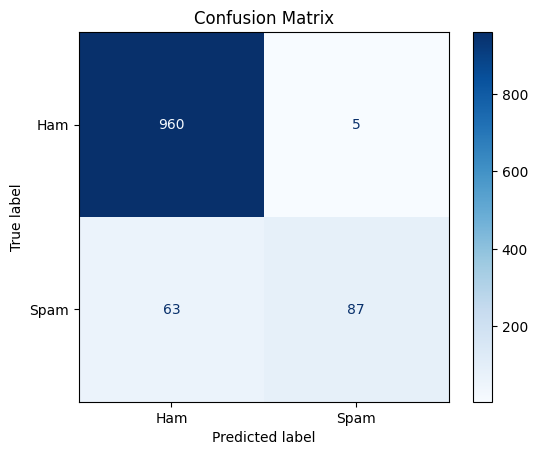

C:\Users\hitar\AppData\Local\Temp\ipykernel_18548\3723573785.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metric_values, palette='viridis')
c:\Users\hitar\Anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hitar\Anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hitar\Anaconda3\Lib\site-packages\seaborn\_base.py:948: 

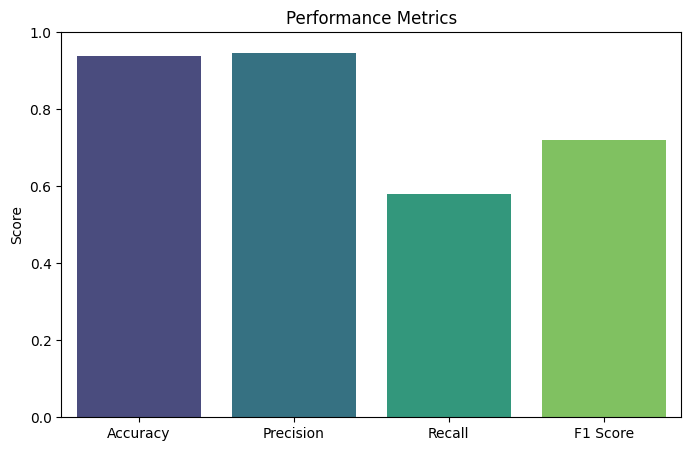

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=['Ham', 'Spam']).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Bar Plot for Performance Metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Convert the metrics dictionary to two lists for plotting
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Plot the metrics
plt.figure(figsize=(8, 5))
sns.barplot(x=metric_names, y=metric_values, palette='viridis')
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()
